## Store Sales Analysis

### Importing required libraries and datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
train = pd.read_csv("C:/Users/ADITYA NARANJE/Ineuron/Store Sales Prediction/Dataset/Train.csv")
test = pd.read_csv("C:/Users/ADITYA NARANJE/Ineuron/Store Sales Prediction/Dataset/Test.csv")

In [3]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
for i in train.columns:
    per = train[i].isnull().sum()/len(train)
    print("Feature {} has {}% data missing".format(i,round(per*100,3)))

Feature Item_Identifier has 0.0% data missing
Feature Item_Weight has 17.165% data missing
Feature Item_Fat_Content has 0.0% data missing
Feature Item_Visibility has 0.0% data missing
Feature Item_Type has 0.0% data missing
Feature Item_MRP has 0.0% data missing
Feature Outlet_Identifier has 0.0% data missing
Feature Outlet_Establishment_Year has 0.0% data missing
Feature Outlet_Size has 28.276% data missing
Feature Outlet_Location_Type has 0.0% data missing
Feature Outlet_Type has 0.0% data missing
Feature Item_Outlet_Sales has 0.0% data missing


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Cleaning and Analysis.

In [6]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].mode())

In [8]:
group = train.groupby("Item_Type")["Item_Weight"].mean()

In [9]:
group

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [10]:
for i in range(len(group)):
    g = (train['Item_Type'] == group.index[i]) & (train['Item_Weight'].isna() == True)
    train['Item_Weight'] = np.select([g], [group[i]], train['Item_Weight'])

In [11]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857890         0.066132   140.992782                1997.831867   
std       4.232804         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.867061         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [12]:
fig = px.box(train, x = "Item_Outlet_Sales",height=400,width=700)
fig.show()

In [13]:
q1 = train["Item_Outlet_Sales"].quantile(0.25)
q3 = train["Item_Outlet_Sales"].quantile(0.75)
iqr = q3 - q1
upper_bound = q3+1.5*iqr

In [14]:
group1 = train.groupby("Item_Type")["Item_Outlet_Sales"].mean()

In [15]:
group1

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [16]:
for i in range(len(group1)):
    g = (train['Item_Type'] == group1.index[i]) & (train['Item_Outlet_Sales'] > upper_bound)
    train['Item_Outlet_Sales'] = np.select([g], [group1[i]], train['Item_Outlet_Sales'])

In [17]:
for i in train.columns:
    if train[i].dtype=="object":
        print("{} has unique values {}".format(i,train[i].unique()))

Item_Identifier has unique values ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content has unique values ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type has unique values ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier has unique values ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size has unique values ['Medium' nan 'High' 'Small']
Outlet_Location_Type has unique values ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type has unique values ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


### Feature Encoding.

In [18]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace(['Low Fat','Regular','low fat','LF','reg'],
                                                              ['Low Fat','Regular','Low Fat','Low Fat','Regular'])

In [19]:
train["Item_Type"] = train["Item_Type"].replace(['Dairy','Soft Drinks','Meat','Fruits and Vegetables',
                                                 'Household','Baking Goods','Snack Foods','Frozen Foods',
                                                 'Breakfast','Health and Hygiene','Hard Drinks','Canned',
                                                 'Breads','Starchy Foods','Others','Seafood'],
                                               ['Food','Drinks','Food','Food',
                                                 'Others','Others','Food','Food',
                                                 'Food','Others','Drinks','Food',
                                                 'Food','Food','Others','Food'])

In [20]:
train["Outlet_Location_Type"] = train["Outlet_Location_Type"].replace(['Tier 1','Tier 3','Tier 2'],
                                                                      [1,3,2])

### Data Visualizations.

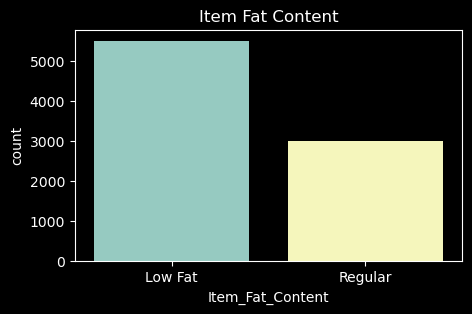

In [21]:
plt.figure(figsize=(5,3))
sns.countplot(train["Item_Fat_Content"])
plt.title("Item Fat Content")
plt.show()

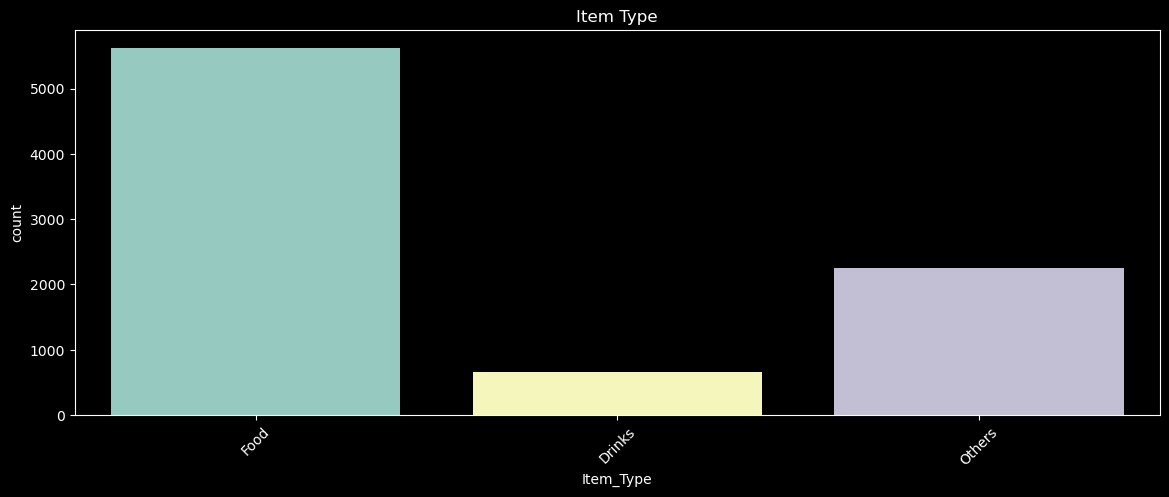

In [22]:
plt.figure(figsize=(14,5))
sns.countplot(train["Item_Type"])
plt.title("Item Type")
plt.xticks(rotation=45)
plt.show()

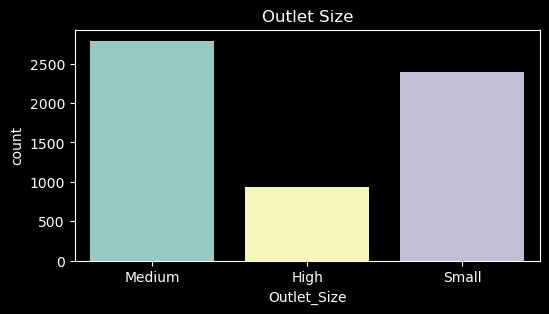

In [23]:
plt.figure(figsize=(6,3))
sns.countplot(train["Outlet_Size"])
plt.title("Outlet Size")
plt.show()

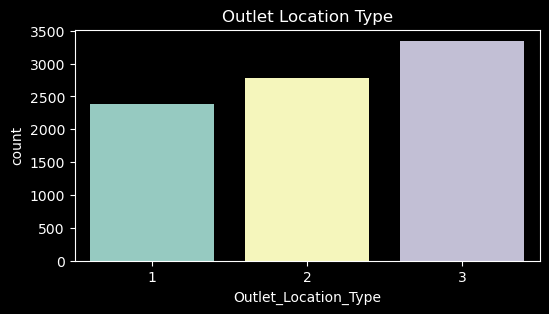

In [24]:
plt.figure(figsize=(6,3))
sns.countplot(train["Outlet_Location_Type"])
plt.title("Outlet Location Type")
plt.show()

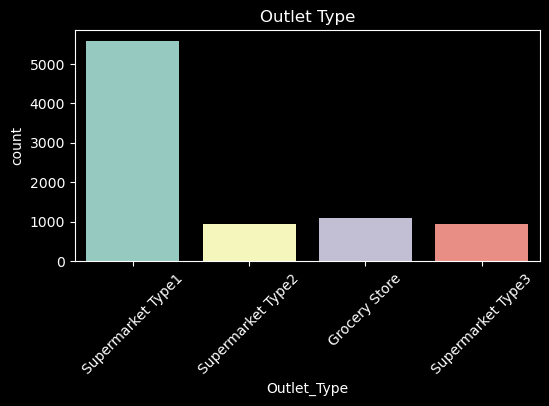

In [25]:
plt.figure(figsize=(6,3))
sns.countplot(train["Outlet_Type"])
plt.title("Outlet Type")
plt.xticks(rotation=45)
plt.show()

In [26]:
for i in train.columns:
    if train[i].dtype!="object":
        print(i)      

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Outlet_Location_Type
Item_Outlet_Sales


In [27]:
fig = px.scatter(train,"Item_MRP","Item_Outlet_Sales",color="Outlet_Type",height=500,width=800)
fig.show()

In [28]:
fig = px.scatter(train,"Item_Weight","Item_Outlet_Sales",color="Outlet_Location_Type",height=500,width=800)
fig.show()

In [29]:
fig = px.histogram(train,"Item_Weight",height=400,width=800)
fig.show()

In [30]:
fig = px.histogram(train,"Item_MRP",height=400,width=800)
fig.show()

In [31]:
fig = px.histogram(train,"Item_Outlet_Sales",height=400,width=800)
fig.show()

In [32]:
train["sqr_Item_Outlet_Sales"] = np.sqrt(train["Item_Outlet_Sales"])

In [33]:
fig = px.histogram(train,"sqr_Item_Outlet_Sales",height=400,width=800)
fig.show()

In [34]:
fig = px.histogram(train,"Item_Visibility",height=400,width=800)
fig.show()

In [35]:
train.columns,train.shape

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales', 'sqr_Item_Outlet_Sales'],
       dtype='object'),
 (8523, 13))

### Correlation Heatmap.

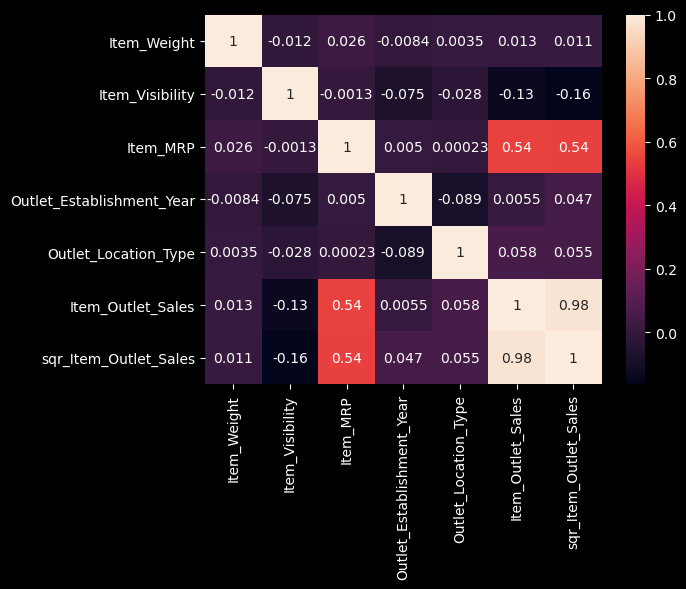

In [36]:
sns.heatmap(train.corr(),annot=True)
plt.show()

In [37]:
train["cbr_Item_Visibility"] = np.cbrt(train["Item_Visibility"])

### One-Hot Encoding.

In [38]:
category_col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type']

In [39]:
train = pd.get_dummies(train,columns=category_col,drop_first=False)

In [40]:
train.drop(columns=["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year","sqr_Item_Outlet_Sales","Item_Visibility"],inplace=True)

In [41]:
train.to_csv("modified_train.csv",index=False)

### Working on test data same as we work on train data.

In [42]:
for i in test.columns:
    per = test[i].isnull().sum()/len(test)
    print("Feature {} has {}% data missing".format(i,round(per*100,3)))

Feature Item_Identifier has 0.0% data missing
Feature Item_Weight has 17.18% data missing
Feature Item_Fat_Content has 0.0% data missing
Feature Item_Visibility has 0.0% data missing
Feature Item_Type has 0.0% data missing
Feature Item_MRP has 0.0% data missing
Feature Outlet_Identifier has 0.0% data missing
Feature Outlet_Establishment_Year has 0.0% data missing
Feature Outlet_Size has 28.27% data missing
Feature Outlet_Location_Type has 0.0% data missing
Feature Outlet_Type has 0.0% data missing


In [43]:
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].mode())

In [44]:
for i in range(len(group)):
    g = (test['Item_Type'] == group.index[i]) & (test['Item_Weight'].isna() == True)
    test['Item_Weight'] = np.select([g], [group[i]], test['Item_Weight'])

In [45]:
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace(['Low Fat','Regular','low fat','LF','reg'],
                                                              ['Low Fat','Regular','Low Fat','Low Fat','Regular'])

In [46]:
test["Item_Type"] = test["Item_Type"].replace(['Dairy','Soft Drinks','Meat','Fruits and Vegetables',
                                                 'Household','Baking Goods','Snack Foods','Frozen Foods',
                                                 'Breakfast','Health and Hygiene','Hard Drinks','Canned',
                                                 'Breads','Starchy Foods','Others','Seafood'],
                                               ['Food','Drinks','Food','Food',
                                                 'Others','Others','Food','Food',
                                                 'Food','Others','Drinks','Food',
                                                 'Food','Food','Others','Food'])

In [47]:
test["Outlet_Location_Type"] = test["Outlet_Location_Type"].replace(['Tier 1','Tier 3','Tier 2'],
                                                                      [1,3,2])

In [48]:
test["cbr_Item_Visibility"] = np.cbrt(test["Item_Visibility"])

In [49]:
test = pd.get_dummies(test,columns=category_col,drop_first=False)

In [50]:
test.drop(columns=["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year","Item_Visibility"],inplace=True)

In [51]:
X = train.drop(columns=["Item_Outlet_Sales"])

In [52]:
test = test[X.columns]

In [53]:
test.to_csv("modified_test.csv",index=False)